# SVM for classification, without and with kernels

In this notebook we are going to explore the use of Support Vector Machines (SVMs) for image classification. We are going to use the famous MNIST dataset, that is a dataset of handwritten digits. We get the data from mldata.org, that is a public repository for machine learning data.

The dataset consists of 70,000 images of handwritten digits (i.e., 0, 1, ... 9). Each image is 28 pixels by 28 pixels and we can think of it as a vector of 28x28 = 784 numbers. Each number is an integer between 0 and 255. For each image we have the corresponding label (i.e., 0, 1, ..., 9).

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml

In [2]:
ID = 2005949
np.random.seed(ID)

Now let's load the dataset. 'data' contains the input, 'target' contains the label. We normalize the data by dividing each value by 255 so that each value is in [0,1]

In [3]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
mnist = fetch_openml('mnist_784', version=1)
# rescale the data
X, y = mnist.data / 255., mnist.target


Now split into training and test. We keep 500 samples in the training set. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

**IMPORTANT**: if you cannot run the SVM with 500 samples or 1000 samples (see below), try with a smaller number of samples (e.g. 200 here and 400 below).

In [4]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]
print(X)
print(y)
m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts = True)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['3' '0' '0' ... '5' '4' '4']
Labels and frequencies in training dataset: 


(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([52, 56, 71, 43, 48, 38, 53, 52, 44, 43], dtype=int64))

We now provide a function to print an image in a dataset, the corresponding true label, and the index of the image in the dataset.

In [ ]:
#function for plotting a digit and printing the corresponding labe
def plot_digit(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %s" % labels[index])
    return

As an example, let's print the 100-th image in X_train and the 40,000-th image in X_test and their true labels.

INPUT:


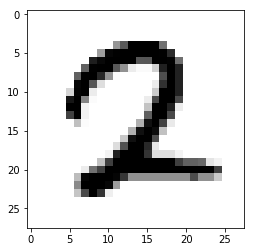

LABEL: 2
INPUT:


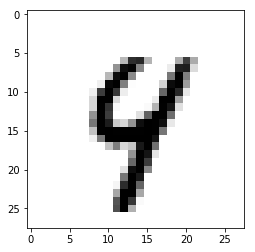

LABEL: 4


In [ ]:
#let's try the plotting function
plot_digit(X_train,y_train,100)
plot_digit(X_test,y_test,40000)

## TO DO 1
Run SVM with cross validation to pick a kernel and values of parameters. Use a 5-fold cross-validation to pick the best kernel and choice of parameters. We provide some potential choice for parameters, but change the grid if needed (e.g., it takes too long). For the SVM for classification use SVC from sklearn.svm; for the grid search we suggest you use GridSearchCV from sklearn.model_selection, but you can implement your own cross-validation for model selection if you prefer.

Print the best parameters used as well as the score obtained by the best model

In [ ]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [1, 10, 100]}

#run linear SVM
linear_SVM = SVC(kernel='linear')


#find best model uusing 5-fold CV 
#and train it using all the training data
# ADD CODE
#cv default value if None, changed from 3-fold to 5-fold.
cross_val = GridSearchCV(estimator=linear_SVM, param_grid =parameters, cv = 5)
cross_val.fit(X_train, y_train)


print ('RESULTS FOR LINEAR KERNEL\n')
 
print("Best parameters set found:")
# ADD CODE
print(cross_val.best_params_)

print("Score with best parameters:")
# ADD CODE
print(cross_val.best_score_)

    
print("\nAll scores on the grid:")
print(cross_val.cv_results_)


# parameters for poly with degree 2 kernel
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)

# ADD CODE: DO THE SAME AS ABOVE FOR POLYNOMIAL KERNEL WITH DEGREE=2

cross_val2 = GridSearchCV(estimator=poly2_SVM, param_grid =parameters, cv = 5)

cross_val2.fit(X_train, y_train)

print ('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Best parameters set found:")
# ADD CODE
print(cross_val2.best_params_)

print("Score with best parameters:")
print(cross_val2.best_score_)

print("\nAll scores on the grid:")
# ADD CODE
print(cross_val2.cv_results_)

# parameters for rbf SVM
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')
cross_val3 = GridSearchCV(estimator=rbf_SVM, param_grid =parameters, cv = 5)

cross_val3.fit(X_train, y_train)

# ADD CODE: DO THE SAME AS ABOVE FOR RBF KERNEL

print ('\nRESULTS FOR rbf KERNEL\n')

print("Best parameters set found:")
print(cross_val3.best_params_)

print("Score with best parameters:")
print(cross_val3.best_score_)

print("\nAll scores on the grid:")
print(cross_val3.cv_results_) 

C:\Users\irems\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR LINEAR KERNEL

Best parameters set found:
{'C': 1}
Score with best parameters:
0.87

All scores on the grid:
{'mean_fit_time': array([0.21499119, 0.21952252, 0.20584483]), 'std_fit_time': array([0.00580949, 0.00937339, 0.00795787]), 'mean_score_time': array([0.05025945, 0.05238342, 0.04923792]), 'std_score_time': array([0.00385867, 0.00390589, 0.00194746]), 'param_C': masked_array(data=[1, 10, 100],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1}, {'C': 10}, {'C': 100}], 'split0_test_score': array([0.88571429, 0.88571429, 0.88571429]), 'split1_test_score': array([0.91262136, 0.91262136, 0.91262136]), 'split2_test_score': array([0.87128713, 0.87128713, 0.87128713]), 'split3_test_score': array([0.86458333, 0.86458333, 0.86458333]), 'split4_test_score': array([0.81052632, 0.81052632, 0.81052632]), 'mean_test_score': array([0.87, 0.87, 0.87]), 'std_test_score': array([0.0332279, 0.0332279, 0.0332279]), 'rank_test_sc

C:\Users\irems\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.862

All scores on the grid:
{'mean_fit_time': array([0.30629058, 0.27000904, 0.27107716, 0.27357101, 0.27398758,
       0.27758002, 0.27269492, 0.28113589, 0.28054643]), 'std_fit_time': array([0.01010541, 0.00738846, 0.00755522, 0.01333393, 0.0089404 ,
       0.00712646, 0.00804594, 0.00608977, 0.00986864]), 'mean_score_time': array([0.05891991, 0.0545464 , 0.05208468, 0.05226812, 0.0547555 ,
       0.05321498, 0.05236578, 0.05285778, 0.05415955]), 'std_score_time': array([0.00216478, 0.00475899, 0.00258195, 0.00273221, 0.00242221,
       0.00266118, 0.00207985, 0.00339747, 0.00343761]), 'param_C': masked_array(data=[1, 1, 1, 10, 10, 10, 100, 100, 100],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.01, 0.1, 1.0, 0.01, 0.1, 1.0, 0.

C:\Users\irems\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



RESULTS FOR rbf KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.882

All scores on the grid:
{'mean_fit_time': array([0.34282188, 0.52742658, 0.53624363, 0.38024158, 0.51640096,
       0.52657685, 0.38012528, 0.51747403, 0.52225575]), 'std_fit_time': array([0.008936  , 0.01186422, 0.01225446, 0.0124836 , 0.01201077,
       0.00859602, 0.00560592, 0.01747606, 0.0146838 ]), 'mean_score_time': array([0.06293273, 0.0715436 , 0.06920371, 0.06192961, 0.07081656,
       0.07220736, 0.0638701 , 0.0704011 , 0.07060504]), 'std_score_time': array([0.00409127, 0.00260087, 0.00345178, 0.0045065 , 0.00552479,
       0.00265325, 0.00484451, 0.00184287, 0.00397177]), 'param_C': masked_array(data=[1, 1, 1, 10, 10, 10, 100, 100, 100],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.01, 0.1, 1.0, 0.01, 0.1, 1.0, 0.01, 0.1, 1

## TO DO 2
For the "best" SVM kernel and choice of parameters from above, train the model on the entire training set and measure the training error. Also make predictions on the test set and measure the test error. Print the training and the test error.

In [ ]:
#get training and test error for the best SVM model from CV
parameters = {'C': [10],'gamma':[0.01]}
rbf_SVM = SVC(kernel='rbf')
best_SVM = rbf_SVM

# fit the model on the entire training set
# ADD CODE
best_SVM.fit(X_train, y_train)

#get the training and test error
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

C:\Users\irems\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best SVM training error: 0.160000
Best SVM test error: 0.231468


## Use logistic regression for comparison

## TO DO 3

Just for comparison let's also use logistic regression, first with the default values of the parameter for regularization and then with cross-validation to fix the value of the parameter. For cross validation, use 5-fold cross validation and the default values of the regularization parameters for the function linear_model.LogisticRegressionCV(...)

In [ ]:
from sklearn import linear_model

lr = linear_model.LogisticRegression()
# fit the model on the training data
# ADD CODE
lr.fit(X_train, y_train)

#compute training and test error for model above
training_error = 1 - lr.score(X_train,y_train)
test_error = 1 - lr.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

#logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
# use 5-fold CV to find the best choice of the parameter, than train
# the model on the entire training set
#Changed in version 0.22: cv default value if None changed from 3-fold to 5-fold.
lr_cv = linear_model.LogisticRegressionCV(cv = 5)
lr_cv.fit(X_train,y_train)
training_error_cv = 1 - lr_cv.score(X_train, y_train)
test_error_cv = 1 - lr_cv.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error_cv)
print ("Best logistic regression test error: %f" % test_error_cv)

C:\Users\irems\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\irems\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.163755


C:\Users\irems\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.172446


## TO DO 4 
Compare and comment the results from SVM and logistic regression.


With SVM rbf kernel, which is the best one according to the results, I have had the training error=0.16 whereas the test_error= 0.23, with logistic regression both the training errors are 0.0 and the test error results are lower than rbf svm, which is respectively 0.1637 and 0.172.
I think that maybe if we had more data, it would make more sense choosing rbf svm, with respect to the error values. For logistic regression, in my opinion the data size is too low therefore the cross validation one has a higher error compared to the other logistic regressor

## TO DO 5
Write the code that finds and plots a digit that is missclassified by logistic regression (optimized for the regularization parameter) and correctly classified by the "best" SVM.

Original Label :  ['0'] RBF SVM Prediction: ['0'] Logistic Regression Prediction :  ['3']
INPUT:


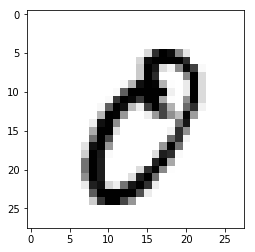

LABEL: ['0']


In [ ]:
# ADD CODE
prediction_for_lr = lr.predict(X_test)  #to get the values which logistic regression predicted in order to compare the actual labels
pred_lr = (prediction_for_lr == y_test)  #comparing the actual labels and the ones founded by lr

prediction_for_svm = best_SVM.predict(X_test)  #to get the values which RBF SVM predicted in order to compare the actual label
pred_SVM = (prediction_for_svm == y_test)    #comparing the actual labels and the ones founded by rbf kernel
  
misclassified_for_lr = np.asarray(np.where(pred_lr == False))  #misclassified ones for logistic regression
correctly_classified_rbf_svm = np.asarray(np.where(pred_SVM == True))  #correclty classified ones for SVM

goal = np.in1d(misclassified_for_lr,correctly_classified_rbf_svm) #goal is to find the ones correclty classified for svm and misclassified by lr
indexes_of_goals = np.where(goal == True)  #indexes of the values which is found

mlr_csvm = np.take(misclassified_for_lr, indexes_of_goals) #the ones which has been missclassified by logistic regression, but correctly classified with svm
mlr_csvm = mlr_csvm.reshape((len(mlr_csvm[0])), len(mlr_csvm))
index = mlr_csvm[1]
print("Original Label : ",y_test[index], "RBF SVM Prediction:", prediction_for_svm[index], "Logistic Regression Prediction : ", prediction_for_lr[index] )
plot_digit(X_test,y_test,index)



## More data
Now let's do the same but using 1000 data points for training. 

## TO DO 6
Repeat the entire analysis above using 1000 samples. Of course you can copy the code from above.

## TO DO 7
Compare and comment on the differences with the results above.


## Compare and result:

For 1000 samples, the results are better for all the models. For linear, poly of degree 2, and rbf kernel SVMs, the best scores were 0.87, 0.862. 0.882, after making the samples 1000, the best scores went up to the numbers: 0.884,0.907,0.923 which was a clear improvement for all these SVMs with different kernels. The best SVM remained the same as rbf kernel and for rbf kernel the training and test error were:0.16 and 0.23. After increasing the sample count the training and test error became: 0.09 and 0.134, which is also a visible improvement. For logistic regression the first one had the training and test error: 0.00 , 0.163 and the second one had the training error:0.00 and 0.17.
After increasing the total number of samples, the training and test error has improved as well too: first one: 0.00    0.134  second one: 0.00  0.144.
But still with 1000 samples logistic regression performed better than the best SVM which is rbf.
In my opinion if the number of samples keep increasing, then the SVM's will outperform the logistic regression

In [ ]:
m_training = 1000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [1, 10, 100]}

#run linear SVM
linear_SVM = SVC(kernel='linear')


#find best model uusing 5-fold CV 
#and train it using all the training data
# ADD CODE
#cv default value if None, changed from 3-fold to 5-fold.
cross_val = GridSearchCV(estimator=linear_SVM, param_grid =parameters, cv = 5)
cross_val.fit(X_train, y_train)


print ('RESULTS FOR LINEAR KERNEL\n')
 
print("Best parameters set found:")
# ADD CODE
print(cross_val.best_params_)

print("Score with best parameters:")
# ADD CODE
print(cross_val.best_score_)

    
print("\nAll scores on the grid:")
print(cross_val.cv_results_)


# parameters for poly with degree 2 kernel
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)

# ADD CODE: DO THE SAME AS ABOVE FOR POLYNOMIAL KERNEL WITH DEGREE=2

cross_val2 = GridSearchCV(estimator=poly2_SVM, param_grid =parameters, cv = 5)

cross_val2.fit(X_train, y_train)

print ('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Best parameters set found:")
# ADD CODE
print(cross_val2.best_params_)

print("Score with best parameters:")
print(cross_val2.best_score_)

print("\nAll scores on the grid:")
# ADD CODE
print(cross_val2.cv_results_)

# parameters for rbf SVM
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')
cross_val3 = GridSearchCV(estimator=rbf_SVM, param_grid =parameters, cv = 5)

cross_val3.fit(X_train, y_train)

# ADD CODE: DO THE SAME AS ABOVE FOR RBF KERNEL

print ('\nRESULTS FOR rbf KERNEL\n')

print("Best parameters set found:")
print(cross_val3.best_params_)

print("Score with best parameters:")
print(cross_val3.best_score_)

print("\nAll scores on the grid:")
print(cross_val3.cv_results_) 

#get training and test error for the best SVM model from CV
parameters = {'C': [10],'gamma':[0.01]}
rbf_SVM = SVC(kernel='rbf')
best_SVM = rbf_SVM

# fit the model on the entire training set
# ADD CODE
best_SVM.fit(X_train, y_train)

#get the training and test error
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)
from sklearn import linear_model

lr = linear_model.LogisticRegression()
# fit the model on the training data
# ADD CODE
lr.fit(X_train, y_train)

#compute training and test error for model above
training_error = 1 - lr.score(X_train,y_train)
test_error = 1 - lr.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

#logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
# use 5-fold CV to find the best choice of the parameter, than train
# the model on the entire training set
#Changed in version 0.22: cv default value if None changed from 3-fold to 5-fold.
lr_cv = linear_model.LogisticRegressionCV(cv = 5)
lr_cv.fit(X_train,y_train)
training_error_cv = 1 - lr_cv.score(X_train, y_train)
test_error_cv = 1 - lr_cv.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error_cv)
print ("Best logistic regression test error: %f" % test_error_cv)

RESULTS FOR LINEAR KERNEL

Best parameters set found:
{'C': 1}
Score with best parameters:
0.884

All scores on the grid:
{'mean_fit_time': array([0.73971148, 0.75932922, 0.72617531]), 'std_fit_time': array([0.02972851, 0.03920526, 0.02306823]), 'mean_score_time': array([0.23215013, 0.21656942, 0.21828938]), 'std_score_time': array([0.01316546, 0.01534826, 0.01000786]), 'param_C': masked_array(data=[1, 10, 100],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1}, {'C': 10}, {'C': 100}], 'split0_test_score': array([0.91666667, 0.91666667, 0.91666667]), 'split1_test_score': array([0.86633663, 0.86633663, 0.86633663]), 'split2_test_score': array([0.87, 0.87, 0.87]), 'split3_test_score': array([0.88944724, 0.88944724, 0.88944724]), 'split4_test_score': array([0.87692308, 0.87692308, 0.87692308]), 'mean_test_score': array([0.884, 0.884, 0.884]), 'std_test_score': array([0.01831897, 0.01831897, 0.01831897]), 'rank_test_score': array

C:\Users\irems\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



RESULTS FOR rbf KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.923

All scores on the grid:
{'mean_fit_time': array([1.2672493 , 2.61418629, 2.85145483, 1.31271811, 2.84702377,
       2.7264843 , 1.22550783, 2.63095174, 2.62498398]), 'std_fit_time': array([0.04071425, 0.04884428, 0.13523966, 0.02259882, 0.07767057,
       0.06728213, 0.02940438, 0.05001711, 0.03252283]), 'mean_score_time': array([0.28983078, 0.34434981, 0.37783294, 0.28453851, 0.37191062,
       0.37189837, 0.26730485, 0.33761253, 0.36083999]), 'std_score_time': array([0.01176322, 0.01014732, 0.01729524, 0.01383929, 0.03532785,
       0.00219413, 0.01724325, 0.01486717, 0.01015581]), 'param_C': masked_array(data=[1, 1, 1, 10, 10, 10, 100, 100, 100],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.01, 0.1, 1.0, 0.01, 0.1, 1.0, 0.01, 0.1, 1

C:\Users\irems\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
